# Part 1

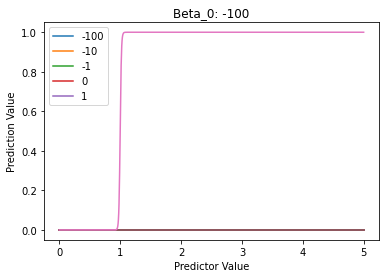

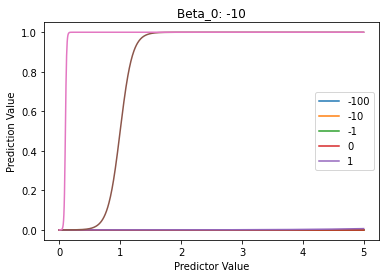

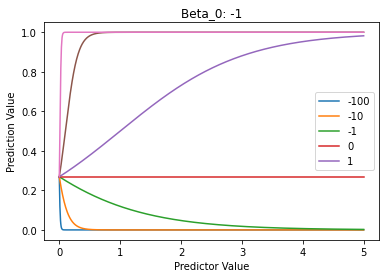

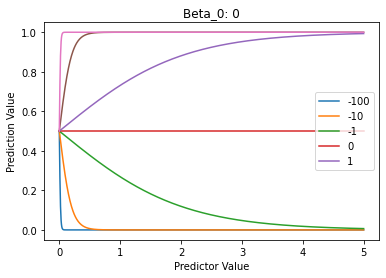

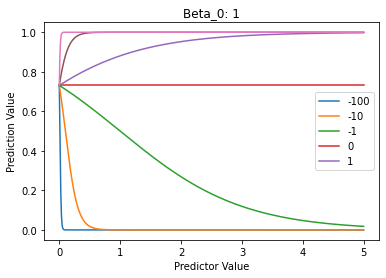

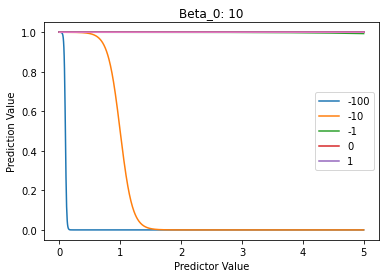

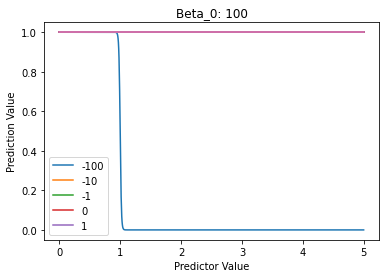

In [40]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import random 

def createFunc(pred, b_0, b_1):
  eVal = np.exp(b_0 + b_1 * pred);
  function = eVal / (1 + eVal);
  return function; 

# Create the domain of predictors
predDomain = np.linspace(0, 5, 1000) # change this to see what happens

b_0Vals = [-100, -10, -1, 0, 1, 10, 100];
b_1Vals = [-100, -10, -1, 0, 1, 10, 100];



for i in range(len(b_0Vals)):
  plt.figure(); 
  plt.title('Beta_0: '+ str(b_0Vals[i]));
  plt.xlabel("Predictor Value");
  plt.ylabel("Prediction Value");
  for j in range(len(b_1Vals)):
    tempFunction = createFunc(predDomain, b_0Vals[i], b_1Vals[j]);
    plt.plot(predDomain, tempFunction);
  plt.legend([b_1Vals[0], b_1Vals[1], b_1Vals[2], b_1Vals[3], b_1Vals[4]]); # might give syntax issues

    


# Part 2

In [41]:
import statsmodels.formula.api as smf
import sklearn as skl
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
df = pd.read_csv("https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv");

trainFraction = .75;

# keep only relevant data
df = df.drop(['depth', 'table', 'x', 'y', 'z'], axis = 1);
print(df);
# create a onehot array from the categorical features of diamond
onehot = pd.get_dummies(df[["cut", "clarity", "color"]]);

# now that we have to onehot, we can drop the original categorical columns
df = df.drop(['cut', 'clarity', 'color'], axis = 1);
#add the onehot to replace the original categorical features
df = pd.concat([onehot, df], axis = 1);

# create training and testing sets
sample = np.random.uniform(size = len(df)) < trainFraction;
trainData = df[sample];
#training sets
xTrain = trainData.drop(['price'], axis = 1);
yTrain = df[sample]['price'];
# testing sets
testData = df[~sample];
xTest = testData.drop(['price'], axis = 1);
yTest = df[~sample]['price'];

print(df);


# Create a linear regression model based on training sets
linRegression = LinearRegression(); 
linRegression.fit(xTrain, yTrain); 

# Call linRegression function to predict prices resulting from xTest
testPred = linRegression.predict(xTest);

# Get MSE and sqrtMSE
newMSE = mean_squared_error(testPred, yTest);
print("MSE: " + str(newMSE));
newSqrtMSE = math.sqrt(newMSE);
print("root of: " + str(newSqrtMSE));


       carat        cut color clarity  price
0       0.23      Ideal     E     SI2    326
1       0.21    Premium     E     SI1    326
2       0.23       Good     E     VS1    327
3       0.29    Premium     I     VS2    334
4       0.31       Good     J     SI2    335
...      ...        ...   ...     ...    ...
53935   0.72      Ideal     D     SI1   2757
53936   0.72       Good     D     SI1   2757
53937   0.70  Very Good     D     SI1   2757
53938   0.86    Premium     H     SI2   2757
53939   0.75      Ideal     D     SI2   2757

[53940 rows x 5 columns]
       cut_Fair  cut_Good  cut_Ideal  ...  color_J  carat  price
0             0         0          1  ...        0   0.23    326
1             0         0          0  ...        0   0.21    326
2             0         1          0  ...        0   0.23    327
3             0         0          0  ...        0   0.29    334
4             0         1          0  ...        1   0.31    335
...         ...       ...        ...  ...   

# Part 3

In [42]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


--2020-09-30 17:07:29--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279995 (273K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv.3’

time_series_covid19 100%[===================>] 273.43K  --.-KB/s    in 0.05s   

2020-09-30 17:07:29 (5.09 MB/s) - ‘time_series_covid19_confirmed_global.csv.3’ saved [279995/279995]



In [43]:
df = pd.read_csv("time_series_covid19_confirmed_global.csv");
US = df.loc[df['Country/Region'] == 'US'];
US = US.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1);

#countryCopy = country.values[0];
US = US.loc[:,(US != 0).any(axis = 0)];
totalColumns = len(US.columns);
USvals = US.values[0];
#print(USvals);

# create a 2D array 
# columns = 5
# rows = number of days from start day to most recent day inclusive
array = np.arange(5 * totalColumns).reshape(totalColumns, 5);

# fill the first row of the array 
array[0][0] = 1;
for i in range(1, 5):
  array[0][i] = 0;


for i in range(1, totalColumns):
  tempDiff = USvals[i] - USvals[i - 1];
  # set temporary binary value as either 0 or 1
  if (tempDiff > 0):
      tempBin = 1;
  
  else:
      tempBin = 0; 
  
  array[i][0] = tempBin; 
  for j in range(1, 5):
    array[i][j] = array[i - 1][j - 1];

#print(array);

# Create our training and testing sets
trainFraction = .75;
sample = np.random.uniform(size = totalColumns) < trainFraction;
trainData = array[sample];
testData = array[~sample];
#training sets
xTr = trainData[:,1:5];
yTr = trainData[:,0];
# testing sets 
xTe = testData[:,1:5];
yTe = testData[:,0];


# Create a linear regression model based on training sets
linRegression = LinearRegression(); 
linRegression.fit(xTr, yTr); 

# use 100% of the US days to build another regression model 
USPredictors = array[:, 1:5];
USOutput = array[:, 0];
linReg100 = LinearRegression();
linReg100.fit(USPredictors, USOutput);

# Call linRegression function to predict prices resulting from xTest
testPred = linRegression.predict(xTe);
print("testPred:")
print(testPred);
for i in range(0, len(testPred)):
  testPred[i] = round(testPred[i]);
print("testPred rounded:")
print(testPred);
difference = testPred - yTe; 
print("Difference  = testPred - yTe:");
print(difference);
sum = 0; 
for i in range(0, len(difference)):
  if (difference[i] == 0):
    sum = sum + 1;

accuracy = sum / len(difference);
print("Accuracy using US to predict US: " + str(accuracy));


testPred:
[0.45844117 0.49011621 0.8448679  0.04712142 0.19701634 0.19701634
 0.8448679  0.45844117 0.98807286 0.98807286 0.98807286 0.98807286
 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286
 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286
 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286
 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286
 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286
 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286
 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286 0.98807286
 0.98807286 0.98807286]
testPred rounded:
[0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Difference  = testPred - yTe:
[ 0. -1.  1.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

Applying US model to Italy. 

In [44]:
Italy = df.loc[df['Country/Region'] == 'Italy'];
Italy = Italy.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1);

#countryCopy = country.values[0];
Italy = Italy.loc[:,(Italy != 0).any(axis = 0)];
totalColumns = len(Italy.columns);
ItalyVals = Italy.values[0];
#print(USvals);

# create a 2D array 
# columns = 5
# rows = number of days from start day to most recent day inclusive
array = np.arange(5 * totalColumns).reshape(totalColumns, 5);

# fill the first row of the array 
array[0][0] = 1;
for i in range(1, 5):
  array[0][i] = 0;


for i in range(1, totalColumns):
  tempDiff = ItalyVals[i] - ItalyVals[i - 1];
  # set temporary binary value as either 0 or 1
  if (tempDiff > 0):
      tempBin = 1;
  
  else:
      tempBin = 0; 
  
  array[i][0] = tempBin; 
  for j in range(1, 5):
    array[i][j] = array[i - 1][j - 1];
array

# Get predictors and output for Italy 

predictors = array[:,1:5];
output = array[:,0];
# testing sets

# Apply the US 100% days model to Italy 
predItaly = linReg100.predict(predictors);
for i in range(0, len(predItaly)):
  predItaly[i] = round(predItaly[i]);
difference = predItaly - output;
sum = 0; 
for i in range(0, len(difference)):
  if (difference[i] == 0):
    sum = sum + 1;

accuracy = sum / len(difference);
print("Accuracy using US to predict Italy: " + str(accuracy));


Accuracy using US to predict Italy: 0.9588477366255144
